In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import src.data.request_water_depth as request_water_depth

In [23]:
## First load latest:
data_depth=pd.Series(dtype=float)
s_depth = request_water_depth.get()
data_depth = data_depth.append(s_depth)

## then load the stored:
data_dir = '../data/raw'
for file_name in os.listdir(data_dir):

    if not os.path.splitext(file_name)[-1] in ['.json','.csv']:
        continue

    file_path = os.path.join(data_dir, file_name)
    s_depth = pd.read_csv(file_path, index_col=0)['value']
    s_depth.index = pd.to_datetime(s_depth.index)

    data_depth = data_depth.append(s_depth)

data_depth = data_depth[~data_depth.index.duplicated()]
data_depth.sort_index(inplace=True)

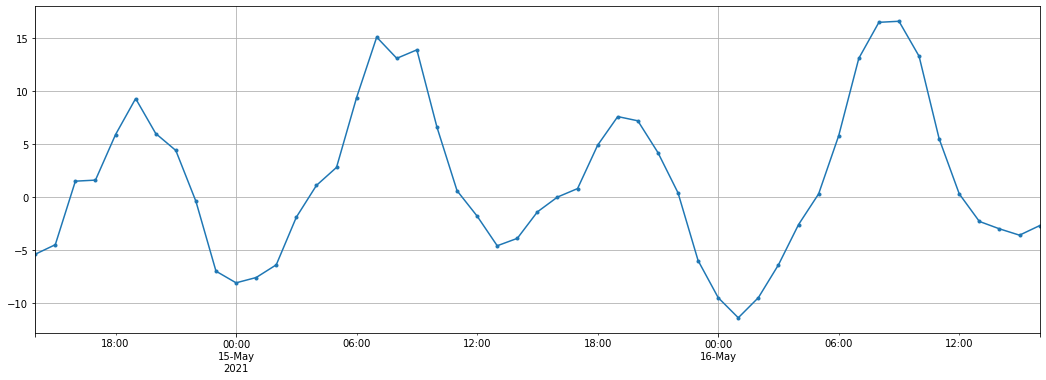

In [27]:
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
data_depth.plot(style='.-', ax=ax)
ax.grid()

In [38]:
periods = data_depth[::12]

In [41]:
df_depth = pd.DataFrame(index=data_depth.index)
df_depth['depth'] = data_depth 

In [45]:
df_depth.loc[periods.index,'period'] = np.arange(len(periods))
df_depth.fillna(method='ffill', inplace=True)

In [46]:
df_depth

,depth,period
2021-05-14 14:00:00+00:00,-5.4,0.0
2021-05-14 15:00:00+00:00,-4.5,0.0
2021-05-14 16:00:00+00:00,1.5,0.0
2021-05-14 17:00:00+00:00,1.6,0.0
2021-05-14 18:00:00+00:00,5.9,0.0
2021-05-14 19:00:00+00:00,9.3,0.0
2021-05-14 20:00:00+00:00,6.0,0.0
2021-05-14 21:00:00+00:00,4.4,0.0
2021-05-14 22:00:00+00:00,-0.4,0.0
2021-05-14 23:00:00+00:00,-7.0,0.0


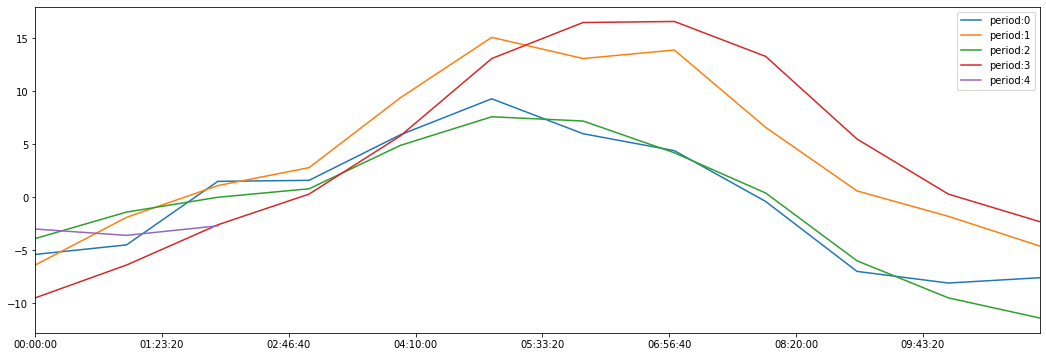

In [50]:
groups = df_depth.groupby(by=['period'])

fig,ax=plt.subplots()
fig.set_size_inches(18,6)

for period,group in groups:
    group.index-=group.index[0]
    group.plot(y='depth', ax=ax, label=f'period:{int(period)}')